# Importing libraries and loading src packages

In [26]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep import eda

In [27]:
sys.path.append("..")

## Importing intern packages

In [28]:
from src.utils.constants import get_folders_constants

# Importing Stats Per game dataset for initial exploration

In [29]:
INTERIM_CSV_BASE_FILEPATH = get_folders_constants()['INTERIM_CSV_BASE_FILEPATH']

PER_GAME_STATS_INTERIM_DATASET_FILENAME = list(
    filter(
        lambda filename: 'per_game' in filename,
        os.listdir(INTERIM_CSV_BASE_FILEPATH)
    )
)[0]

PER_GAME_STATS_INTERIM_DATASET_FILE_PATH = os.path.join(INTERIM_CSV_BASE_FILEPATH, PER_GAME_STATS_INTERIM_DATASET_FILENAME)

In [30]:
per_game_stats_full_dataset_interim_df = pd.read_csv(PER_GAME_STATS_INTERIM_DATASET_FILE_PATH)

In [31]:
per_game_stats_full_dataset_interim_df.head()

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,AST,STL,BLK,TOV,PF,PTS,Season,Playoffs,W,L
0,Phoenix Suns,82,240.6,43.7,90.1,0.485,11.6,31.9,0.364,32.1,...,27.4,8.6,4.4,12.9,19.9,114.8,2022,1,64.0,18.0
1,Memphis Grizzlies,82,241.2,43.5,94.4,0.461,11.5,32.7,0.353,32.0,...,26.0,9.8,6.5,13.2,19.8,115.6,2022,1,56.0,26.0
2,Golden State Warriors,82,240.6,40.5,86.4,0.469,14.3,39.4,0.364,26.2,...,27.1,8.8,4.5,14.9,21.0,111.0,2022,1,53.0,29.0
3,Miami Heat,82,242.1,39.6,84.8,0.467,13.6,35.8,0.379,26.0,...,25.5,7.4,3.2,14.6,20.5,110.0,2022,1,53.0,29.0
4,Dallas Mavericks,82,240.9,39.3,85.1,0.461,13.1,37.4,0.350,26.2,...,23.4,6.7,4.0,12.5,19.7,108.0,2022,1,52.0,30.0


# Exploratory data analyisis

## First step: Understanding dataset

> You don’t know what you don’t know. And if you don’t know what you don’t know, then how are you supposed to know whether your insights make sense or not? You won’t.

### N of features

In [32]:
print("Our dataset contains {} rows and {} features".format(
    *per_game_stats_full_dataset_interim_df.shape
))

Our dataset contains 963 rows and 28 features


### Columns in the dataset

In [33]:
per_game_stats_full_dataset_interim_df.columns

Index(['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Season', 'Playoffs', 'W', 'L'],
      dtype='object')

### Type of columns

In [34]:
per_game_stats_full_dataset_interim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      963 non-null    object 
 1   G         963 non-null    int64  
 2   MP        963 non-null    float64
 3   FG        963 non-null    float64
 4   FGA       963 non-null    float64
 5   FG%       963 non-null    float64
 6   3P        963 non-null    float64
 7   3PA       963 non-null    float64
 8   3P%       963 non-null    float64
 9   2P        963 non-null    float64
 10  2PA       963 non-null    float64
 11  2P%       963 non-null    float64
 12  FT        963 non-null    float64
 13  FTA       963 non-null    float64
 14  FT%       963 non-null    float64
 15  ORB       963 non-null    float64
 16  DRB       963 non-null    float64
 17  TRB       963 non-null    float64
 18  AST       963 non-null    float64
 19  STL       963 non-null    float64
 20  BLK       963 non-null    float6

### First 5 rows

In [35]:
per_game_stats_full_dataset_interim_df.head()

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,AST,STL,BLK,TOV,PF,PTS,Season,Playoffs,W,L
0,Phoenix Suns,82,240.6,43.7,90.1,0.485,11.6,31.9,0.364,32.1,...,27.4,8.6,4.4,12.9,19.9,114.8,2022,1,64.0,18.0
1,Memphis Grizzlies,82,241.2,43.5,94.4,0.461,11.5,32.7,0.353,32.0,...,26.0,9.8,6.5,13.2,19.8,115.6,2022,1,56.0,26.0
2,Golden State Warriors,82,240.6,40.5,86.4,0.469,14.3,39.4,0.364,26.2,...,27.1,8.8,4.5,14.9,21.0,111.0,2022,1,53.0,29.0
3,Miami Heat,82,242.1,39.6,84.8,0.467,13.6,35.8,0.379,26.0,...,25.5,7.4,3.2,14.6,20.5,110.0,2022,1,53.0,29.0
4,Dallas Mavericks,82,240.9,39.3,85.1,0.461,13.1,37.4,0.350,26.2,...,23.4,6.7,4.0,12.5,19.7,108.0,2022,1,52.0,30.0


### Data description

In [36]:
per_game_stats_full_dataset_interim_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
G,963.0,79.869159,6.466410,50.000,82.000,82.000,82.000,82.000
MP,963.0,241.724611,0.867708,240.000,241.200,241.800,242.100,244.900
FG,963.0,37.907996,2.622937,30.800,36.100,37.700,39.600,47.600
FGA,963.0,83.024403,4.204296,71.200,80.000,82.700,86.100,108.100
FG%,963.0,0.456461,0.017967,0.401,0.444,0.456,0.468,0.512
3P,963.0,6.586189,3.111732,0.500,4.200,6.100,8.400,16.700
3PA,963.0,18.551298,8.386482,2.400,12.700,17.100,23.200,45.400
3P%,963.0,0.350398,0.025551,0.188,0.338,0.353,0.367,0.428
2P,963.0,31.325545,3.482456,23.100,29.200,30.800,32.500,43.900
2PA,963.0,64.472690,7.837518,41.900,59.600,63.900,68.000,95.200


### Check for missing data

In [37]:
per_game_stats_full_dataset_interim_df.isna().sum()

Team        0
G           0
MP          0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%         0
2P          0
2PA         0
2P%         0
FT          0
FTA         0
FT%         0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
Season      0
Playoffs    0
W           0
L           0
dtype: int64

### Profilling data

In [38]:
report = eda.create_report(per_game_stats_full_dataset_interim_df)

  0%|                                                                                                         …

d:\home\documents\brian\develop\projects\machine learning\beginner\linear regression\predicting_nba_wins\.venv\lib\site-packages\dataprep\eda\distribution\render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))


### Show report in new tab

In [39]:
report.show_browser()

### Saving report

In [40]:
report.save("../../reports/Stats Per game dataset report.html")

Report has been saved to ..\..\reports\Stats Per game dataset report.html!


#### Saving dataset sample as html

In [41]:
with open('../../reports/tables/per_game_stats_full_dataset_interim_sample.html', 'w') as per_game_stats_full_dataset_interim_sample:
    per_game_stats_full_dataset_interim_sample.write(
        per_game_stats_full_dataset_interim_df.sample(5).to_html(index=False)
    )

## Understanding features

### `2P` feature

#### Visualizing data

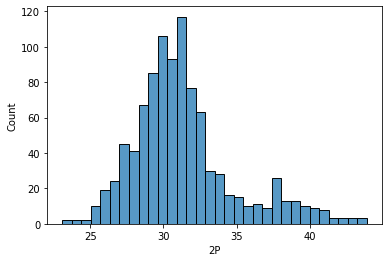

In [42]:
sns.histplot(x='2P', data=per_game_stats_full_dataset_interim_df)
plt.show()

#### KDE Plot

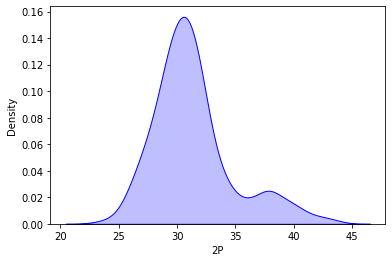

In [58]:
sns.kdeplot(x='2P', data=per_game_stats_full_dataset_interim_df, shade = True, color = "blue")
plt.show()

#### Skewness

In simple words, skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution. Now, you might be thinking – why am I talking about normal distribution here?

Well, the normal distribution is the probability distribution without any skewness. You can look at the image below which shows symmetrical distribution that’s basically a normal distribution and you can see that it is symmetrical on both sides of the dashed line.

In [50]:
from scipy.stats import skew

In [52]:
skewness = skew(per_game_stats_full_dataset_interim_df['2P'])
skewness

1.0612528588462138

> **A skewness value greater than 1 or less than -1 indicates a highly skewed distribution.** A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

#### Box plot

A boxplot can give you information regarding the shape, variability, and center (or median) of a statistical data set. 

A boxplot can show whether a data set is symmetric (roughly the same on each side when cut down the middle) or skewed (lopsided). A symmetric data set shows the median roughly in the middle of the box.
The median, part of the five-number summary, is shown by the line that cuts through the box in the boxplot.

Skewed data show a lopsided boxplot, where the median cuts the box into two unequal pieces. If the longer part of the box is to the right (or above) the median, the data is said to be skewed right. If the longer part is to the left (or below) the median, the data is skewed left.

> If one side of the box is longer than the other, it does not mean that side contains more data. In fact, you can't tell the sample size by looking at a boxplot; it's based on percentages of the sample size, not the sample size itself. Each section of the boxplot (the minimum to Q1, Q1 to the median, the median to Q3, and Q3 to the maximum) contains 25 percent of the data no matter what. If one of the sections is longer than another, it indicates a wider range in the values of data in that section (meaning the data are more spread out). A smaller section of the boxplot indicates the data are more condensed (closer together).

The five number summary includes 5 items:
    
![](https://miro.medium.com/max/700/1*8lzi5NGN87MPJ72qBr4nbg.png)

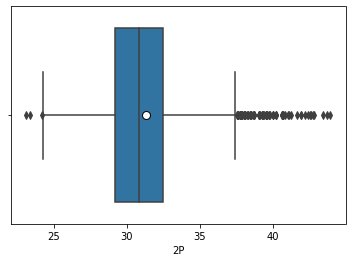

In [81]:
sns.boxplot(
    x='2P', data=per_game_stats_full_dataset_interim_df,
    showmeans=True, 
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"}
)
plt.show()

|      Statistic       | Value |                                                                                                       Explanation                                                                                                       |
|:--------------------:|:-----:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|     **Minimum**      | 23.1  |                                                                                             The smaller observation is 23.1                                                                                             |
| **5-th Percentile**  | 26.7  |                                                                                   Less than 5% of observations are smaller than 26.7                                                                                    |
|        **Q1**        | 29.2  |                                                                                        25% of observations are smaller than 29.2                                                                                        |
|      **Median**      | 30.8  |                                                                                    50% of observations are smaller/bigger than 30.8                                                                                     |
|        **Q3**        | 32.5  |                                                                                        75% of observations are smaller than 32.5                                                                                        |
| **95-th Percentile** | 38.7  |                                                                                      Only 5% of observations are bigger than 38.7                                                                                       |
|     **Maximum**      | 43.9  |                                                                                               The max observation is 43.9                                                                                               |
|      **Range**       | 20.8  |                                                                      The difference between the smaller observation and the bigger observation is                                                                       |
|       **IQR**        |  3.3  | The range gives us a measurement of how spread out the entirety of our data set is. The interquartile range, which tells us how far apart Q1 and Q3 are, indicates how spread out the middle 50% of our set of data is. |


The dataset has almost 90 outliers, using information from the Box Plot

#### Rugplot

A rug plot draws ticks on the x-axis that show the location of individual data points.

The dense areas are places where most observations fall under while the heights of the ticks are inconsequential.

Rug plots complement histograms when it comes to outliers because we can see where the outlier data points fall. The code below creates a rugplot and histogram for the kilometers driven feature. Note the outlier positions.

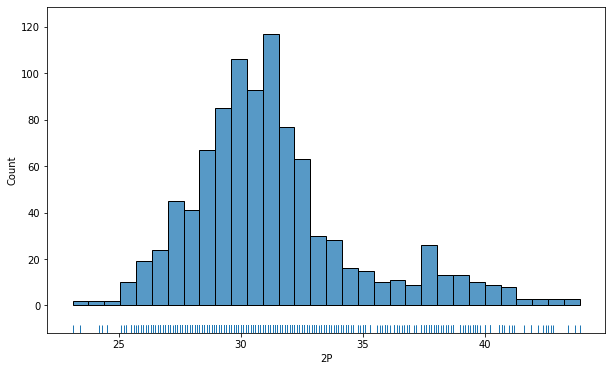

In [94]:

plt.figure(figsize=(10,6))
sns.rugplot(
    x='2P', data=per_game_stats_full_dataset_interim_df,
)
sns.histplot(
    x='2P', data=per_game_stats_full_dataset_interim_df,
)
plt.show()

#### Violin plot

The violin plot features a combination of a box plot and a kernel density plot. This means that in addition to showing the quartiles, it also lays out the underlying distribution such as presence and location of different peaks.

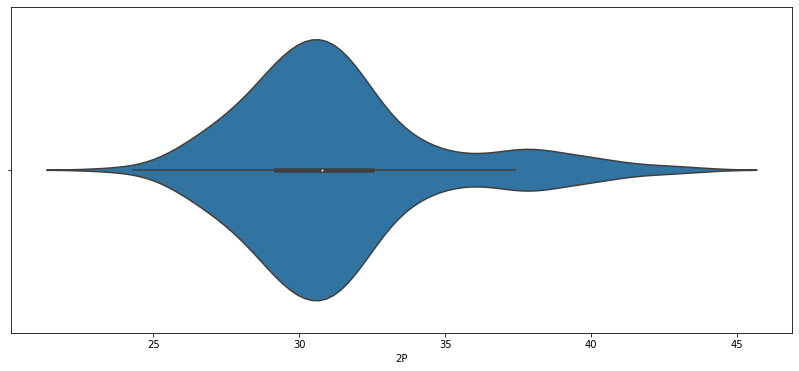

In [96]:
plt.figure(figsize=(14,6))
sns.violinplot(
    x='2P', data=per_game_stats_full_dataset_interim_df,
)
plt.show()

#### Kurtosis

Like skewness, kurtosis is a statistical measure that is used to describe distribution. Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean). Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

> For example in investing, high kurtosis of the return distribution implies the investor will experience occasional extreme returns (either positive or negative), more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of returns. This phenomenon is known as kurtosis risk.

In [86]:
from scipy.stats import kurtosis

In [87]:
kurtosis_score = kurtosis(per_game_stats_full_dataset_interim_df['2P'])
kurtosis_score

1.2175231535967113

![](https://www.vosesoftware.com/riskwiki/images/image15_403.gif)

> A positive kurtosis means that the distribution is more peaked than a normal distribution. A negative kurtosis means that the distribution is less peaked than a normal distribution. A kurtosis of 3 means that the distribution is exactly like a normal distribution.

**In our case, we have a platykurtic distribution.** The term "platykurtic" refers to a statistical distribution in which the excess kurtosis value is negative. For this reason, a platykurtic distribution will have thinner tails than a normal distribution will, **resulting in fewer extreme positive or negative events.** The opposite of a platykurtic distribution is a leptokurtic distribution, in which excess kurtosis is positive.

## Second step: Feature selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having too many irrelevant features in your data can decrease the accuracy of the models. Three benefits of performing feature selection before modeling your data are:

- **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.
- **Improves Accuracy**: Less misleading data means modeling accuracy improves.
- **Reduces Training Time**: Less data means that algorithms train faster.

### Creating datasets and standarizing data

In [108]:
COLUMNS_TO_DISCARD = ['Team','Season', 'Playoffs', 'L','G', 'MP']

In [115]:
per_game_stats_full_dataset_interim_df_selected_columns = per_game_stats_full_dataset_interim_df.drop(COLUMNS_TO_DISCARD, axis = 1)

#### Standarizing data

##### Initializing scaler

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

##### Scaling data

In [198]:
per_game_stats_full_dataset_interim_scaled_df = pd.DataFrame(
    scaler.fit_transform(per_game_stats_full_dataset_interim_df_selected_columns),
    columns = per_game_stats_full_dataset_interim_df_selected_columns.columns
)

per_game_stats_full_dataset_interim_scaled_df.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W
0,2.209360,1.683819,1.589267,1.612098,1.592520,0.532638,0.222503,-0.800757,2.420726,-1.267499,...,-1.079602,1.918484,1.255641,2.095749,0.757822,-0.658861,-1.468257,-0.812460,2.014170,1.869003
1,2.133070,2.707114,0.252763,1.579945,1.687961,0.101900,0.193773,-0.353955,1.205671,-0.759627,...,1.337682,1.710909,3.066767,1.490058,1.964573,1.753186,-1.240729,-0.864267,2.131347,1.247696
2,0.988720,0.803309,0.698264,2.480233,2.487281,0.532638,-1.472584,-2.230524,2.648549,-1.406010,...,-1.079602,2.001514,1.348519,1.965958,0.958947,-0.544002,0.048593,-0.242576,1.457579,1.014705
3,0.645415,0.422549,0.586889,2.255161,2.057795,1.120007,-1.530045,-1.975208,1.661317,-0.621116,...,-1.079602,1.254244,0.512615,1.273740,-0.448929,-2.037174,-0.178935,-0.501614,1.311108,1.014705
4,0.530980,0.493941,0.252763,2.094395,2.248678,-0.015574,-1.472584,-2.128397,2.306815,-1.036648,...,-1.360682,1.212729,0.187541,0.365203,-1.152867,-1.118299,-1.771627,-0.916075,1.018165,0.937042


In [199]:
X_scaled = per_game_stats_full_dataset_interim_scaled_df.drop('W', axis = 1)
y_scaled = per_game_stats_full_dataset_interim_scaled_df['W']

In [200]:
X.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2.209360,1.683819,1.589267,1.612098,1.592520,0.532638,0.222503,-0.800757,2.420726,-1.267499,...,1.368593,-1.079602,1.918484,1.255641,2.095749,0.757822,-0.658861,-1.468257,-0.812460,2.014170
1,2.133070,2.707114,0.252763,1.579945,1.687961,0.101900,0.193773,-0.353955,1.205671,-0.759627,...,-0.707705,1.337682,1.710909,3.066767,1.490058,1.964573,1.753186,-1.240729,-0.864267,2.131347
2,0.988720,0.803309,0.698264,2.480233,2.487281,0.532638,-1.472584,-2.230524,2.648549,-1.406010,...,0.445794,-1.079602,2.001514,1.348519,1.965958,0.958947,-0.544002,0.048593,-0.242576,1.457579
3,0.645415,0.422549,0.586889,2.255161,2.057795,1.120007,-1.530045,-1.975208,1.661317,-0.621116,...,1.731122,-1.079602,1.254244,0.512615,1.273740,-0.448929,-2.037174,-0.178935,-0.501614,1.311108
4,0.530980,0.493941,0.252763,2.094395,2.248678,-0.015574,-1.472584,-2.128397,2.306815,-1.036648,...,0.511708,-1.360682,1.212729,0.187541,0.365203,-1.152867,-1.118299,-1.771627,-0.916075,1.018165


In [201]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 963 entries, 0 to 962
Series name: W
Non-Null Count  Dtype  
--------------  -----  
963 non-null    float64
dtypes: float64(1)
memory usage: 7.6 KB


In [202]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled,
    test_size=0.3, random_state=42
)

### Recursive Feature Elimination

The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [203]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
# create the RFE model and select 3 attributes
selector = RFE(
    estimator,
    n_features_to_select=5,
    step = 1
)

selector.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [204]:
X.columns[selector.support_]

Index(['FGA', 'FG%', '3P', '3PA', '2PA'], dtype='object')

In [207]:
selector.score(X_test,y_test)

0.4040804152878176

### Univariate Feature Selection with SelectKBest

Univariate Feature Selection is a feature selection method based on the univariate statistical test, e,g: chi2, Pearson-correlation, and many more.

The premise with SelectKBest is combining the univariate statistical test with selecting the K-number of features based on the statistical result between the X and y.

In [211]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [210]:
selector = SelectKBest(mutual_info_regression, k = 4)
selector.fit(X_scaled, y_scaled)
X_train.columns[selector.get_support()]

Index(['FG%', '3P%', '2P%', 'DRB'], dtype='object')

Based on the mutual info regression, we only select the ‘displacement,’ and ‘weight’ features like these are the top features.

## Visualization time

## Basic summary

- We don't have empty values, we fixed them through previous stages of the pipeline
- Team is useful for spec